In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/musheera2/underwater_image_enhancement.git

Cloning into 'underwater_image_enhancement'...
remote: Enumerating objects: 11741, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11741 (delta 0), reused 0 (delta 0), pack-reused 11738
Receiving objects: 100% (11741/11741), 263.48 MiB | 37.46 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (11744/11744), done.


In [3]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import load_img
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing.image import img_to_array

Training Data Set

In [4]:
DATASET="./underwater_image_enhancement/underwater_data/Train/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
#ten types of leaf diseases       
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=450):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            train_data.append([img,label])

In [5]:
len(train_data)

8550

Test Data

In [6]:
DATASET="./underwater_image_enhancement/underwater_data/Test/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
#ten types of leaf diseases       
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))            
            test_data.append([img,label])

In [7]:
print(len(train_data)) # size of train dataset
print(len(test_data))  # size of validation dataset

8550
1900


In [8]:
print(f"The shape of the Training Data:\n")
train_data[0][0].shape

The shape of the Training Data:



(128, 128, 3)

Validation Data

In [9]:
val_data=[]
DATASET="./underwater_image_enhancement/underwater_data/Val/"

CATEGORIES=["Corals", "Crabs", "Dolphin", "Eel", "Jelly Fish", "Lobster", "Nudibranchs", "Octopus", "Penguin", "Puffers", "Sea Rays", "Sea Urchins", "Seahorse", "Seal", "Sharks", "Squid", "Starfish", "Turtle_Tortoise", "Whale"]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in random.choices(os.listdir(path),k=100):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(128,128))
            val_data.append([img,label])
            
print(len(train_data)) # size of train dataset
print(len(test_data))
print(len(val_data))# size of validation dataset

8550
1900
1900


Performing Train_Test_Val splitting

In [10]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [11]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Corals")
    elif i==1:
        Y.append("Crabs")
    elif i==2:
        Y.append("Dolphin")
    elif i==3:
        Y.append("Eel")
    elif i==4:
        Y.append("Jelly Fish")
    elif i==5:
        Y.append("Lobster")
    elif i==6:
        Y.append("Nudibranchs")
    elif i==7:
        Y.append("Octopus")
    elif i==8:
        Y.append("Penguin")
    elif i==9:
        Y.append("Puffers")
    elif i==10:
        Y.append("Sea Rays")
    elif i==11:
        Y.append("Sea Urchins")
    elif i==12:
        Y.append("Seahorse")
    elif i==13:
        Y.append("Seal")
    elif i==14:
        Y.append("Sharks")
    elif i==15:
        Y.append("Squid")
    elif i==16:
        Y.append("Starfish")
    elif i==17:
        Y.append("Turtle_Tortoise")
    else:
        Y.append("Whale")

len(X_train),len(y_train)

(8550, 8550)

In [12]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Corals")
    elif i==1:
        Z.append("Crabs")
    elif i==2:
        Z.append("Dolphin")
    elif i==3:
        Z.append("Eel")
    elif i==4:
        Z.append("Jelly Fish")
    elif i==5:
        Z.append("Lobster")
    elif i==6:
        Z.append("Nudibranchs")
    elif i==7:
        Z.append("Octopus")
    elif i==8:
        Z.append("Penguin")
    elif i==9:
        Z.append("Puffers")
    elif i==10:
        Z.append("Sea Rays")
    elif i==11:
        Z.append("Sea Urchins")
    elif i==12:
        Z.append("Seahorse")
    elif i==13:
        Z.append("Seal")
    elif i==14:
        Z.append("Sharks")
    elif i==15:
        Z.append("Squid")
    elif i==16:
        Z.append("Starfish")
    elif i==17:
        Z.append("Turtle_Tortoise")
    else:
        Z.append("Whale")


len(X_test),len(y_test)

(1900, 1900)

In [13]:
X_val=[]
y_val=[]

for features,label in val_data:
    X_val.append(features)
    y_val.append(label)
    
Z=[]
for i in y_val:
    if i==0:
        Z.append("Corals")
    elif i==1:
        Z.append("Crabs")
    elif i==2:
        Z.append("Dolphin")
    elif i==3:
        Z.append("Eel")
    elif i==4:
        Z.append("Jelly Fish")
    elif i==5:
        Z.append("Lobster")
    elif i==6:
        Z.append("Nudibranchs")
    elif i==7:
        Z.append("Octopus")
    elif i==8:
        Z.append("Penguin")
    elif i==9:
        Z.append("Puffers")
    elif i==10:
        Z.append("Sea Rays")
    elif i==11:
        Z.append("Sea Urchins")
    elif i==12:
        Z.append("Seahorse")
    elif i==13:
        Z.append("Seal")
    elif i==14:
        Z.append("Sharks")
    elif i==15:
        Z.append("Squid")
    elif i==16:
        Z.append("Starfish")
    elif i==17:
        Z.append("Turtle_Tortoise")
    else:
        Z.append("Whale")


len(X_val),len(y_val)

(1900, 1900)

In [14]:
X_train=np.array(X_train).reshape(-1,128,128,3)
X_train=X_train/255.0
print(X_train.shape)

X_test=np.array(X_test).reshape(-1,128,128,3)
X_test=X_test/255.0
print(X_test.shape)

X_val=np.array(X_val).reshape(-1,128,128,3)
X_val=X_val/255.0
print(X_val.shape)


(8550, 128, 128, 3)
(1900, 128, 128, 3)
(1900, 128, 128, 3)


One hot Encoding the labels of Train, Test, Val

In [15]:
y_train=to_categorical(y_train)


y_test=to_categorical(y_test)
y_val = to_categorical(y_val)

In [16]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings("ignore")

In [17]:

IMAGE_SIZE=[128,128]

vgg19_model = VGG19(input_shape =IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2023-01-22 11:40:23.120273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 11:40:23.121238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 11:40:23.253247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 11:40:23.254177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 11:40:23.255035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

80150528/80134624 [==============================] - 0s 0us/step


In [18]:
### don't train existing weights
for layer in vgg19_model.layers:
    layer.trainable = False

In [22]:
### Fine tuning of VGG19
x = Flatten()(vgg19_model.output)
x= Dense(800,activation="relu")(x)
x= Dense(128,activation="relu")(x)
x= Dropout(0.5)(x)
prediction_layer = Dense(19, activation='softmax')(x)


### create a model object
VGG19_model = Model(inputs=vgg19_model.input, outputs=prediction_layer)
VGG19_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### View the model structure
VGG19_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

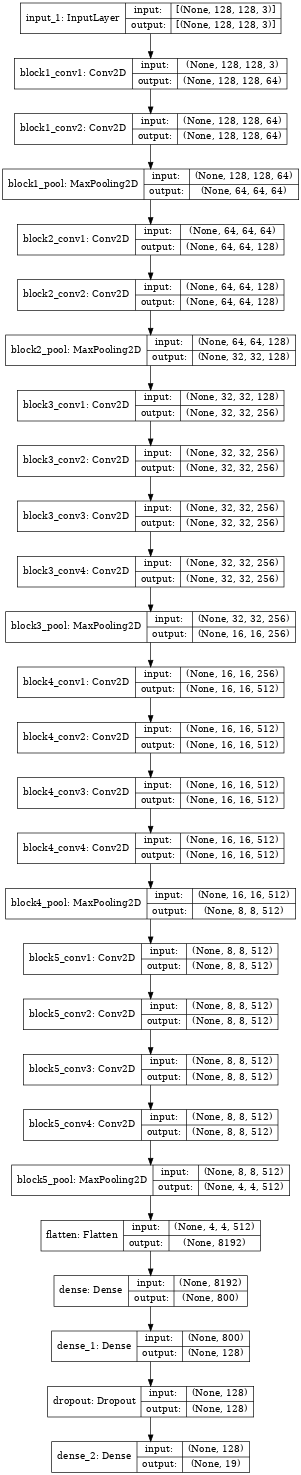

In [20]:
import tensorflow as tf
tf.keras.utils.plot_model(VGG19_model, show_shapes=True, dpi=48)

In [20]:
X_train[0].shape

(128, 128, 3)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

model_checkpoint = ModelCheckpoint(
    filepath="VGG19_model_on_underwater.h5",
    verbose=3,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# early_stopping= EarlyStopping(monitor="val_loss",patience=4,verbose=3,mode="min")

reducelrplateau= ReduceLROnPlateau(monitor='val_loss', factor=0.2,verbose=3,patience=1,mode="min", min_lr=0.0001)


hist=VGG19_model.fit(X_train,y_train,epochs=100,batch_size=128,validation_split=0.2,callbacks= [model_checkpoint,reducelrplateau])

2023-01-22 11:42:12.290860: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1344798720 exceeds 10% of free system memory.
2023-01-22 11:42:13.923850: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1344798720 exceeds 10% of free system memory.
2023-01-22 11:42:15.065195: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2023-01-22 11:42:17.238426: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


54/54 [==============================] - ETA: 0s - loss: 2.7958 - accuracy: 0.1408

2023-01-22 11:42:44.534437: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 336199680 exceeds 10% of free system memory.
2023-01-22 11:42:44.948449: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 336199680 exceeds 10% of free system memory.


54/54 [==============================] - 36s 388ms/step - loss: 2.7958 - accuracy: 0.1408 - val_loss: 2.4628 - val_accuracy: 0.2801

Epoch 00001: val_accuracy improved from -inf to 0.28012, saving model to VGG19_model_on_underwater.h5
Epoch 2/100
54/54 [==============================] - 13s 236ms/step - loss: 2.4456 - accuracy: 0.2235 - val_loss: 2.0056 - val_accuracy: 0.4070

Epoch 00002: val_accuracy improved from 0.28012 to 0.40702, saving model to VGG19_model_on_underwater.h5
Epoch 3/100
54/54 [==============================] - 13s 241ms/step - loss: 2.1963 - accuracy: 0.2962 - val_loss: 1.9172 - val_accuracy: 0.4556

Epoch 00003: val_accuracy improved from 0.40702 to 0.45556, saving model to VGG19_model_on_underwater.h5
Epoch 4/100
54/54 [==============================] - 13s 248ms/step - loss: 1.9884 - accuracy: 0.3621 - val_loss: 1.7132 - val_accuracy: 0.5029

Epoch 00004: val_accuracy improved from 0.45556 to 0.50292, saving model to VGG19_model_on_underwater.h5
Epoch 5/100
54/

In [25]:
VGG19_model.load_weights('./VGG19_model_on_underwater.h5')
# VGG19_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN PROJECTS/MTech Research<Project>/MODELS/VGG19/VGG19_model_on_tomato.h5')

In [26]:
test_loss,test_acc=VGG19_model.evaluate(X_test,y_test)
test_loss,test_acc

2023-01-22 12:15:15.720589: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 373555200 exceeds 10% of free system memory.


60/60 [==============================] - 7s 73ms/step - loss: 2.7318 - accuracy: 0.5147


(2.731808662414551, 0.5147368311882019)

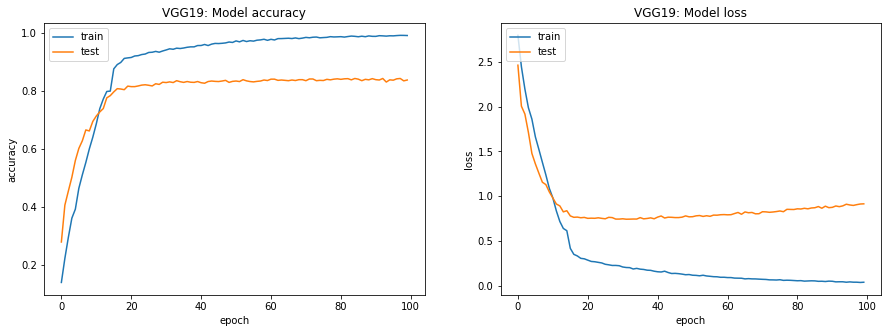

In [24]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('VGG19: Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('VGG19: Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
y_pred=VGG19_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)



In [28]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [29]:
y_test= np.argmax(y_test,axis=-1)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='VGG19:Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


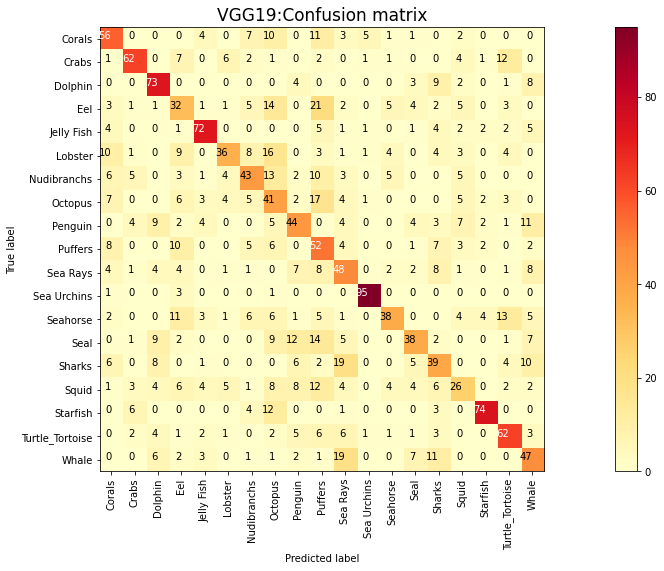

In [31]:
import itertools
plt.figure(figsize=(20,7))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=CATEGORIES)
plt.xticks(rotation=90)
plt.savefig("VGG19 confusion_matrix.jpg")

In [32]:
from sklearn.metrics import classification_report
print("VGG19: Classification Report\n\n")
print(classification_report(y_test,y_pred,target_names=CATEGORIES))

VGG19: Classification Report


                 precision    recall  f1-score   support

         Corals       0.51      0.56      0.54       100
          Crabs       0.72      0.62      0.67       100
        Dolphin       0.62      0.73      0.67       100
            Eel       0.32      0.32      0.32       100
     Jelly Fish       0.73      0.72      0.73       100
        Lobster       0.61      0.36      0.45       100
    Nudibranchs       0.49      0.43      0.46       100
        Octopus       0.28      0.41      0.33       100
        Penguin       0.47      0.44      0.46       100
        Puffers       0.31      0.52      0.39       100
       Sea Rays       0.38      0.48      0.43       100
    Sea Urchins       0.90      0.95      0.93       100
       Seahorse       0.62      0.38      0.47       100
           Seal       0.54      0.38      0.44       100
         Sharks       0.39      0.39      0.39       100
          Squid       0.38      0.26      0.31       100

Sample Prediction

Predicted Label:
[2]---> Dolphin


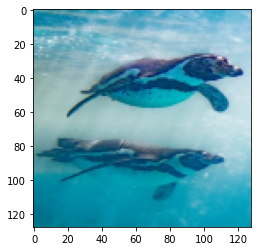

In [33]:
sample_pred=VGG19_model.predict(np.array(X_test[23]).reshape(-1,128,128,3))
sample_pred = np.argmax(sample_pred, axis=-1)
print("Predicted Label:")
plt.imshow(X_test[23])
print(sample_pred,end="---> ")
print(CATEGORIES[sample_pred[0]])

In [35]:
lis=[]
for image,true,pred in zip(X_test,y_test,y_pred):
    lis.append([image,true,pred])

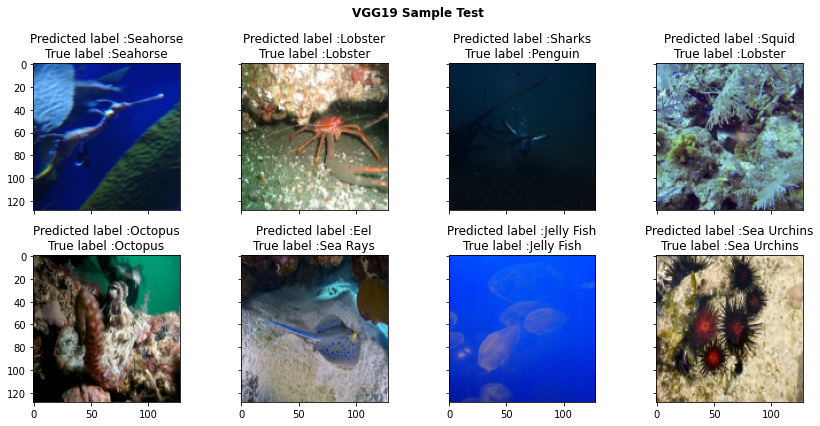

<Figure size 936x432 with 0 Axes>

In [36]:
#Monitoring the model_performance with its predictions and labels
plt.rcParams["figure.figsize"] = (13,6)
n = 0
nrows = 2
ncols = 4

fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
fig.suptitle("VGG19 Sample Test",fontweight ="bold")
for row in range(nrows):
    for col in range(ncols):

        test_image,true_label,pred_label = random.choice(lis) #Make Sure your test image size would be (-1,128,128,3)
        
        ax[row,col].imshow(test_image)
#         sample_pred =  model.predict(np.array(test_image).reshape(-1,128,128,3))
        pred_label = pred_label
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(CATEGORIES[pred_label],CATEGORIES[true_label]))
        n += 1
        plt.tight_layout()
plt.show()
plt.savefig("VGG19 Sample Test.jpeg")


In [38]:
import shutil
shutil.make_archive("VGG19_UNDERWATER", 'zip', "/kaggle/working/")

KeyboardInterrupt: 